In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
df = pd.read_csv(r"C:\Users\Sooraj\Downloads\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#check for missing values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Correlation Matrix

In [5]:
df.corr()

C:\Users\Sooraj\AppData\Local\Temp\ipykernel_15028\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

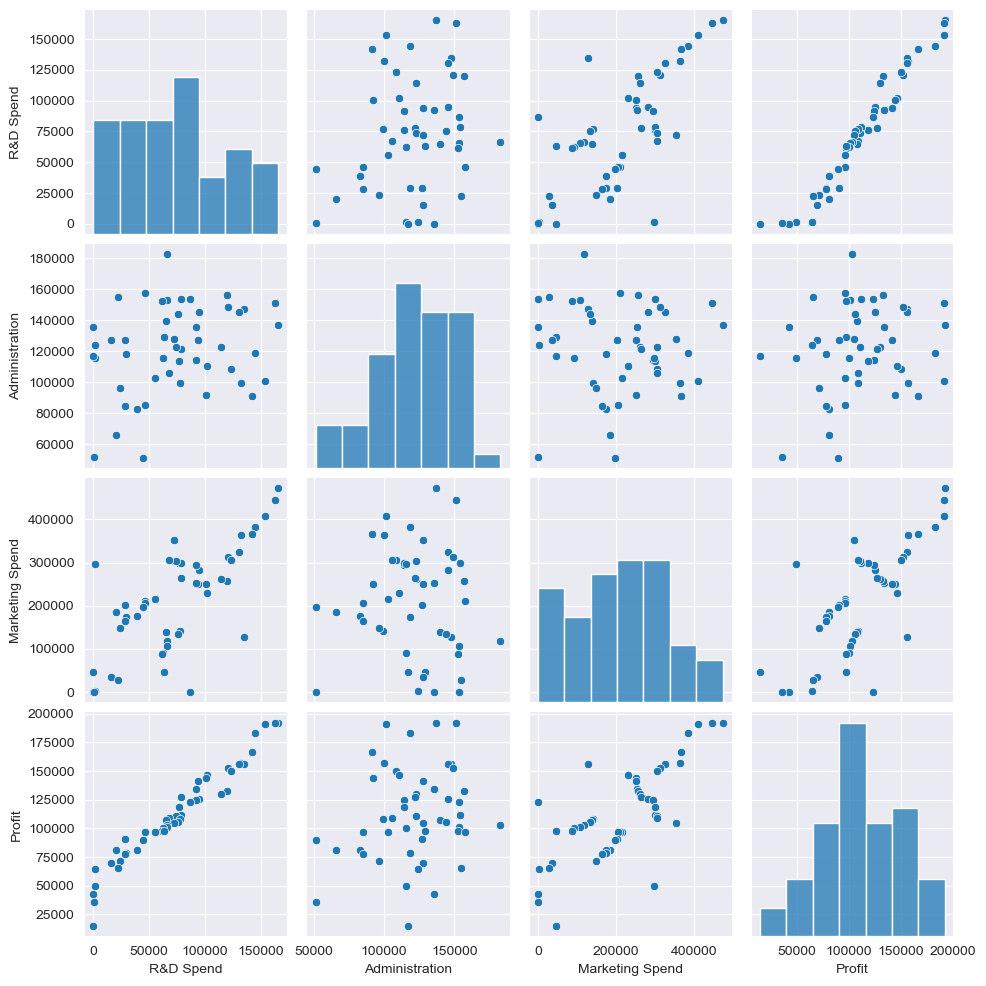

In [6]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Preparing a model

In [7]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit ~ Q("R&D Spend") + Q("Administration") + Q("Marketing Spend")',data=df).fit()

In [8]:
#Coefficients
model.params

Intercept               50122.192990
Q("R&D Spend")              0.805715
Q("Administration")        -0.026816
Q("Marketing Spend")        0.027228
dtype: float64

In [9]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept                7.626218
Q("R&D Spend")          17.846374
Q("Administration")     -0.525507
Q("Marketing Spend")     1.655077
dtype: float64 
 Intercept               1.057379e-09
Q("R&D Spend")          2.634968e-22
Q("Administration")     6.017551e-01
Q("Marketing Spend")    1.047168e-01
dtype: float64


In [10]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Models

In [11]:
ml_r=smf.ols('Profit~Q("R&D Spend")',data = df).fit()  
#t and p-Values
print(ml_r.tvalues, '\n', ml_r.pvalues)  

Intercept         19.320288
Q("R&D Spend")    29.151139
dtype: float64 
 Intercept         2.782697e-24
Q("R&D Spend")    3.500322e-32
dtype: float64


In [12]:
ml_a=smf.ols('Profit ~ Q("Administration")',data = df).fit()  
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept              3.040044
Q("Administration")    1.419493
dtype: float64 
 Intercept              0.003824
Q("Administration")    0.162217
dtype: float64


In [13]:
ml_m=smf.ols('Profit ~ Q("Marketing Spend")',data = df).fit()  
print(ml_m.tvalues, '\n', ml_m.pvalues)  

Intercept               7.808356
Q("Marketing Spend")    7.802657
dtype: float64 
 Intercept               4.294735e-10
Q("Marketing Spend")    4.381073e-10
dtype: float64


# Calculating VIF

In [14]:
rsq_r = smf.ols('Q("R&D Spend")~ Q("Administration") + Q("Marketing Spend")',data=df).fit().rsquared  
vif_r = 1/(1-rsq_r) # 16.33

rsq_a = smf.ols(' Q("Administration")~Q("R&D Spend") + Q("Marketing Spend")',data=df).fit().rsquared  
vif_a = 1/(1-rsq_a) # 564.98

rsq_m = smf.ols('Q("Marketing Spend")~Q("R&D Spend") + Q("Administration") ',data=df).fit().rsquared  
vif_m = 1/(1-rsq_m) #  564.84


# Storing vif values in a data frame
d1 = {'Variables':['R&D','Adm','Mar'],'VIF':[vif_r,vif_a,vif_m]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,R&D,2.468903
1,Adm,1.175091
2,Mar,2.326773


### No Multi-Collinearity as VIF value less than 20

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

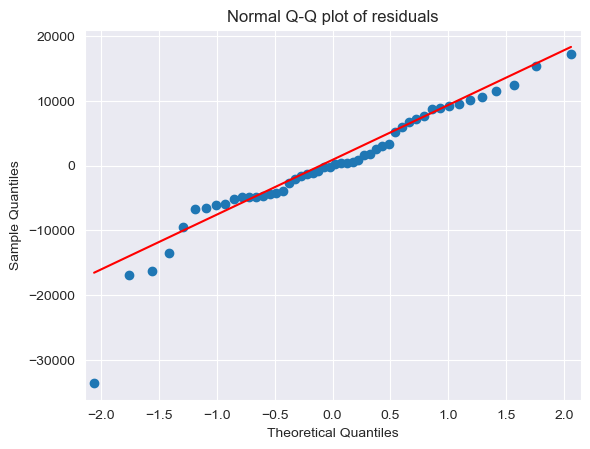

In [15]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [16]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

## Residual Plot for Homoscedasticity

In [17]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

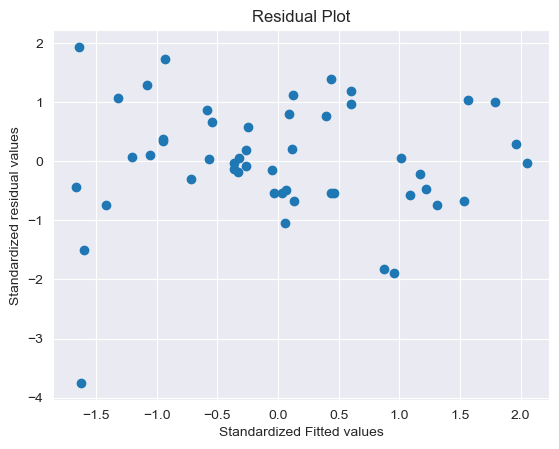

In [18]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


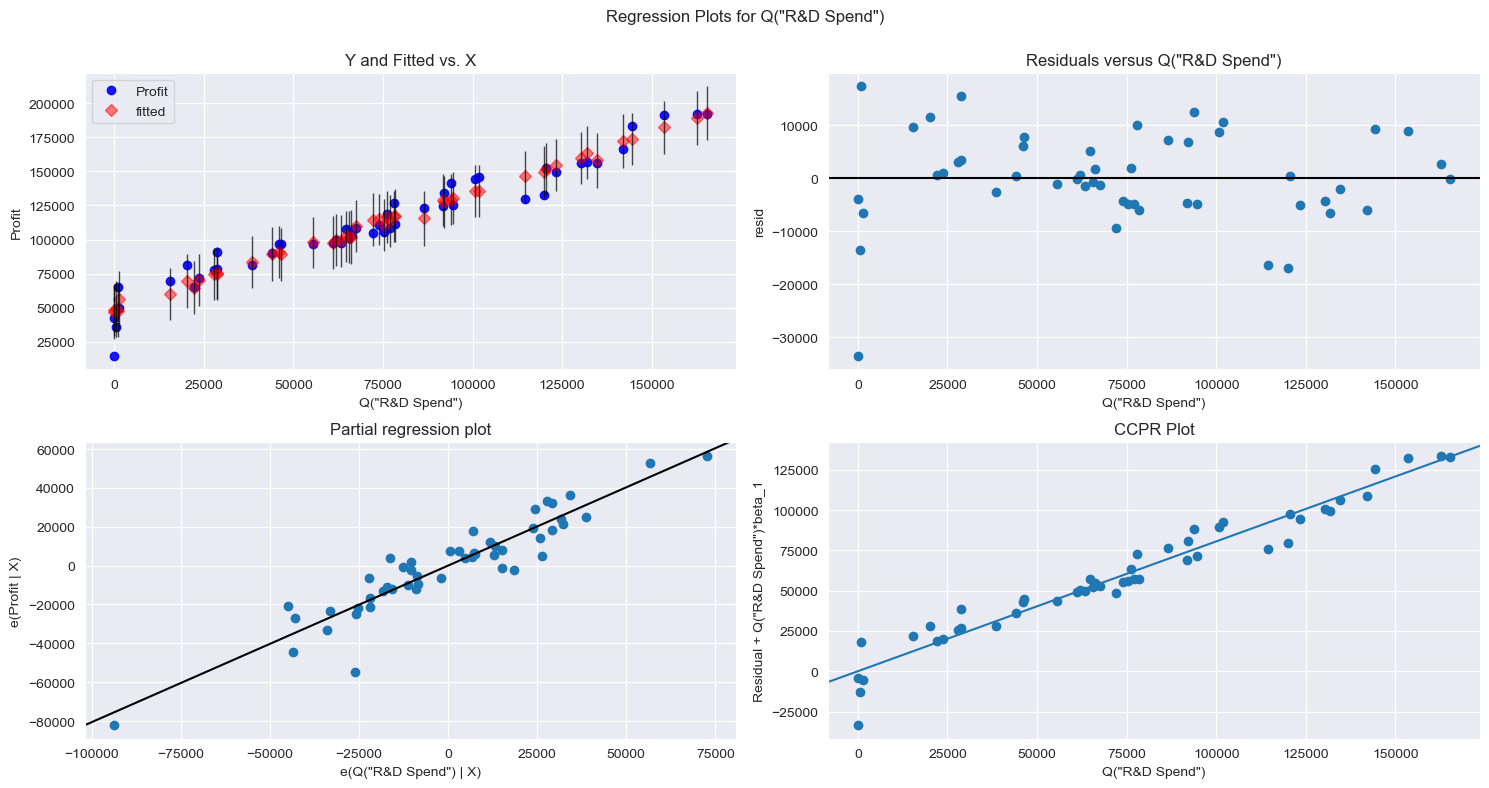

In [19]:
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, 1, fig=fig)
plt.show()

eval_env: 1


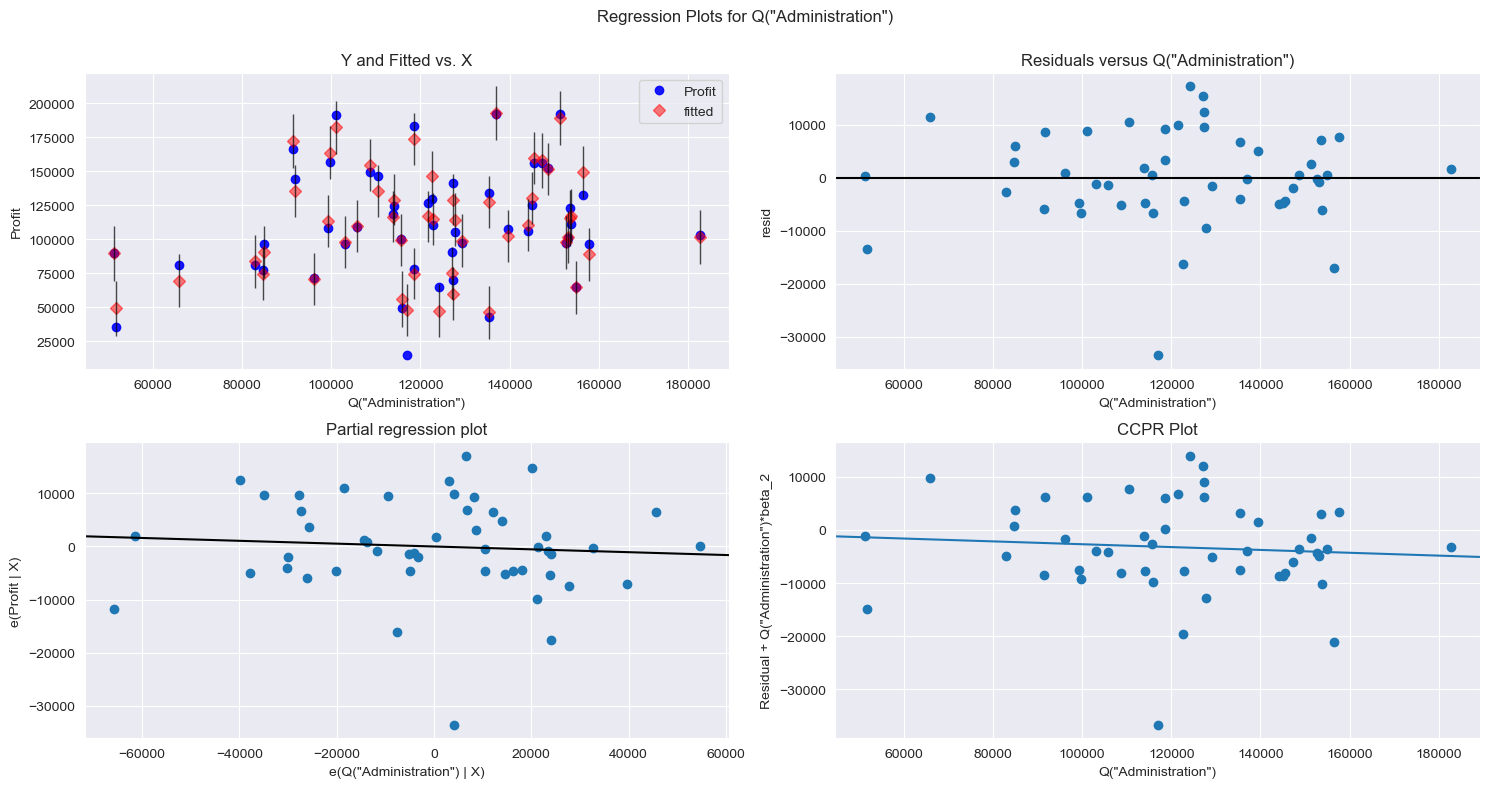

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 2, fig=fig)
plt.show()

eval_env: 1


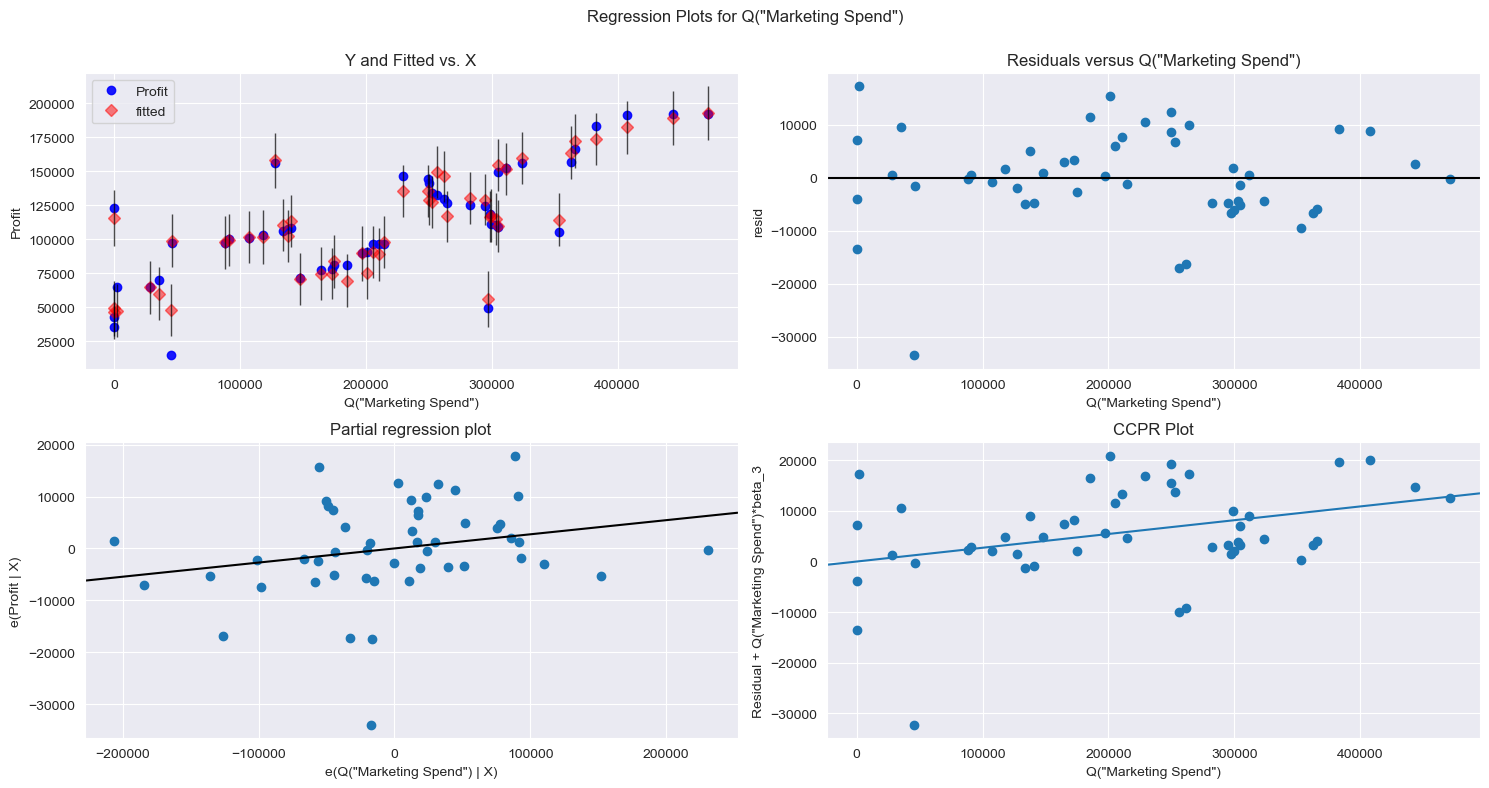

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 3, fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [22]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

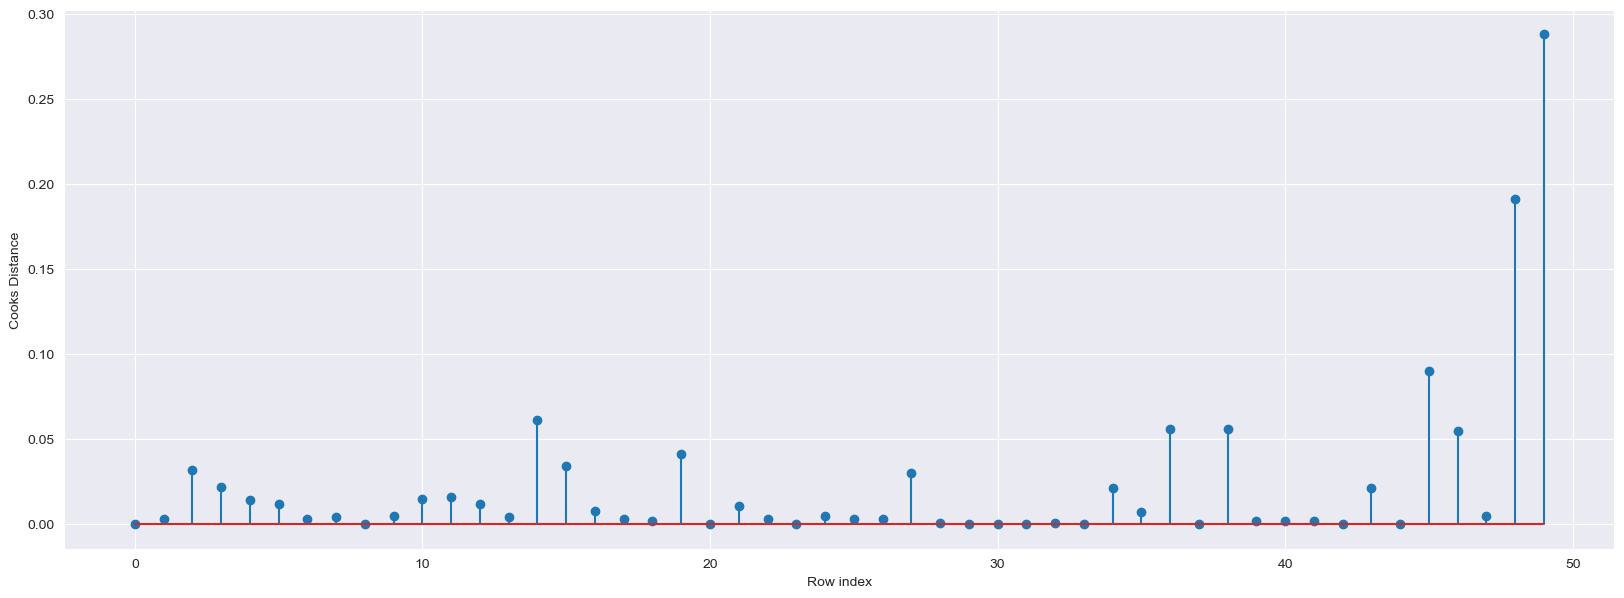

In [23]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

## High Influence points

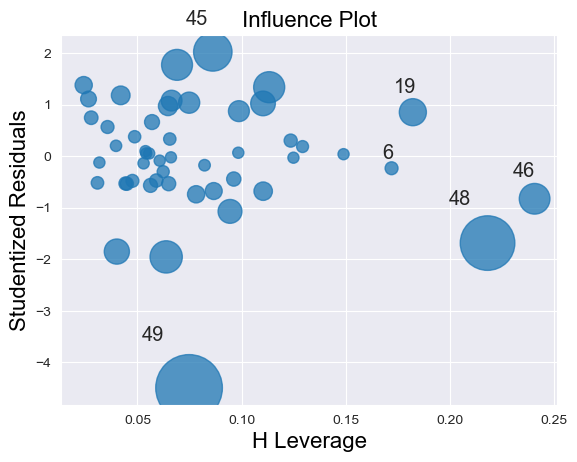

In [25]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [26]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

#### From the above plot, it is evident that data point 49, 49 and 46 are the influencers

In [27]:
df[df.index.isin([49])]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [28]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [29]:
#Load the data
df_new = pd.read_csv(r"C:\Users\Sooraj\Downloads\50_Startups.csv")

In [30]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df_new.drop(df_new.index[[49]],axis=0).reset_index()

In [31]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [32]:
df1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [33]:
#Include all 3 variable and generate R-Squared and AIC values
final_ml_1= smf.ols('Profit ~ Q("R&D Spend") + Q("Administration") + Q("Marketing Spend")',data = df1).fit()

In [34]:
(final_ml_1.rsquared,final_ml_1.aic)

(0.9613162435129847, 1020.5652974526367)

In [35]:
#Exclude variable "Administration" and generate R-Squared and AIC values
final_ml_2= smf.ols('Profit ~ Q("R&D Spend") + Q("Marketing Spend")',data = df1).fit()

In [36]:
(final_ml_2.rsquared,final_ml_2.aic)

(0.9610856807456628, 1018.8564801588338)

##### Comparing above R-Square and AIC values, model 'final_ml_1' has high R- square  hence include variable 'Administration' 

# Cook’s Distance

In [37]:
model_influence_V = final_ml_1.get_influence()
(c_V, _) = model_influence_V.cooks_distance

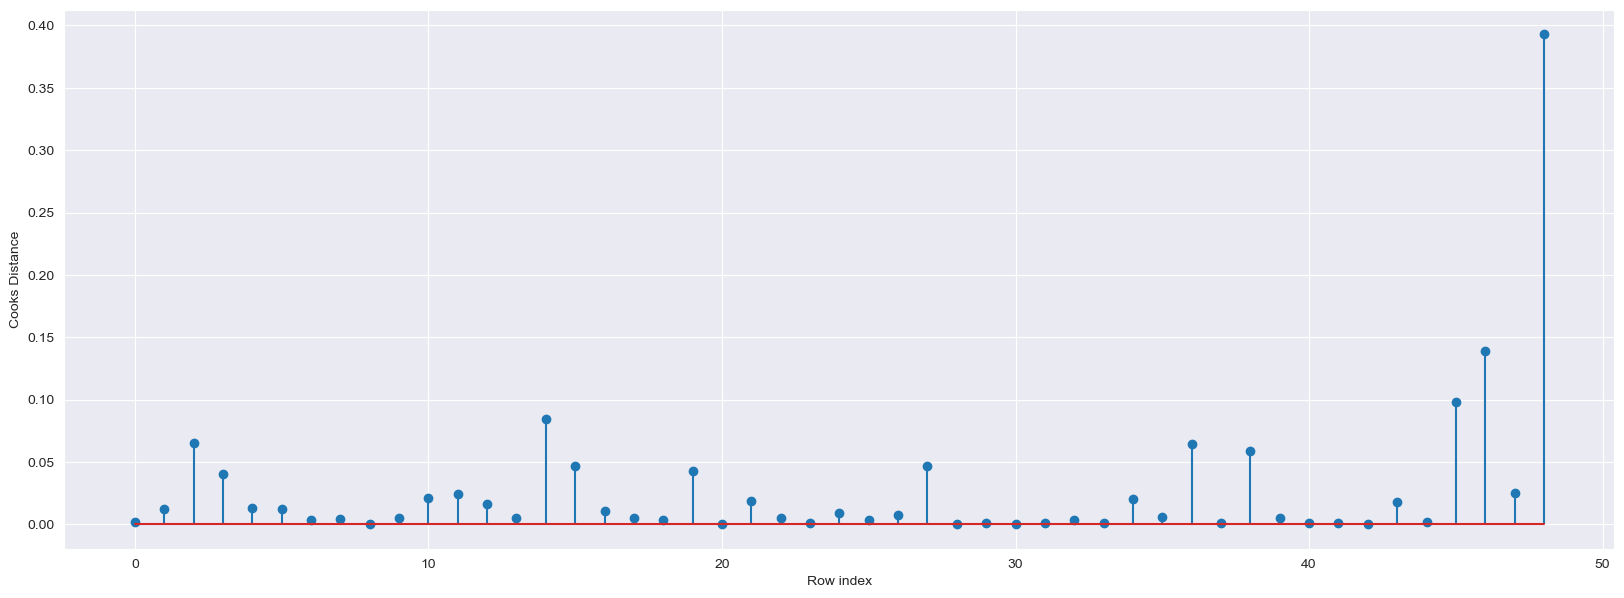

In [38]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [39]:
#index of the data points where c is more than .15
(np.argmax(c_V),np.max(c_V))

(48, 0.39274420556321554)

In [40]:
#Drop 48 observations
df2=df1.drop(df1.index[[48]],axis=0)

In [41]:
df2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [42]:
#Reset the index and re arrange the row values
df3=df2.reset_index()

In [43]:
df4=df3.drop(['index'],axis=1)

In [44]:
df4

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [45]:
#Build the model on the new data
final_ml_2= smf.ols('Profit ~ Q("R&D Spend") + Q("Administration") + Q("Marketing Spend")',data = df4).fit()

In [46]:
#Again check for influencers
model_influence_2 = final_ml_2.get_influence()
(c_V, _) = model_influence_2.cooks_distance

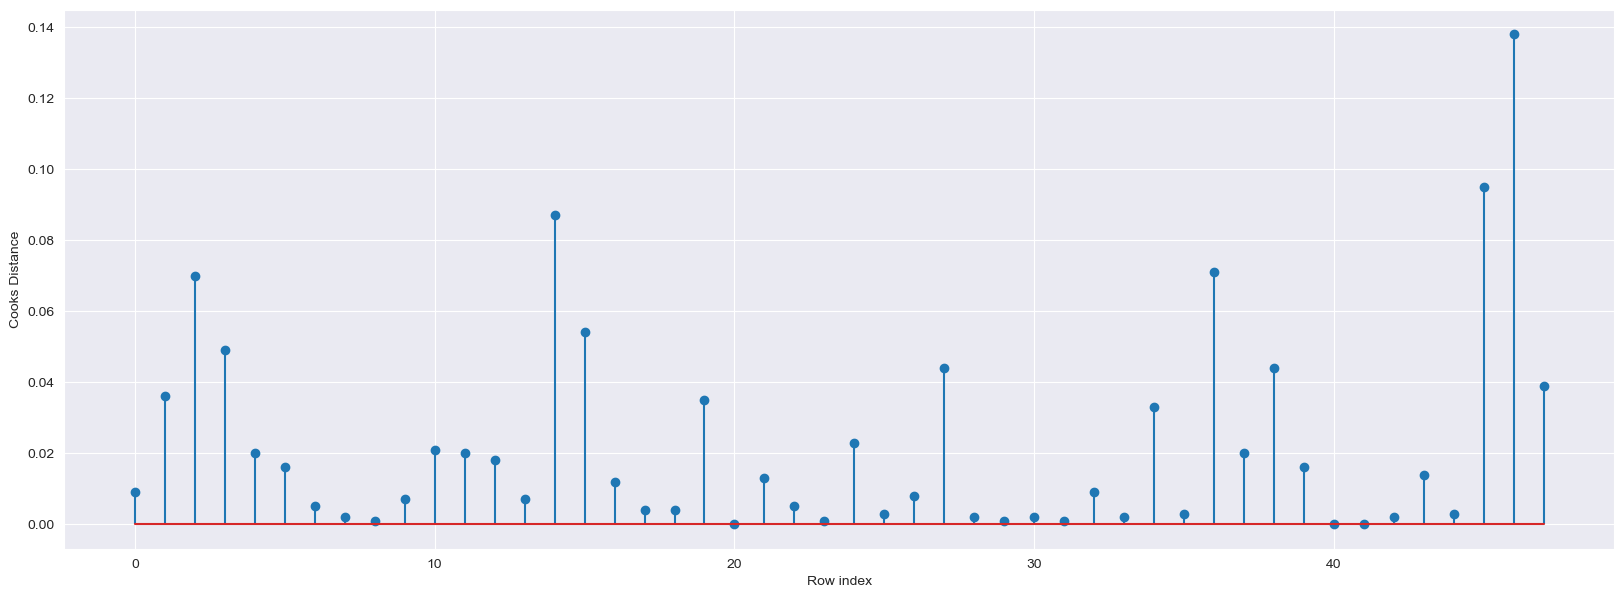

In [47]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [48]:
(np.argmax(c_V),np.max(c_V))

(46, 0.13829133994334772)

#### Since the value is significantly small , we can stop the diagnostic process and finalize the model

In [49]:
#Check the accuracy of the mode
final_ml_2= smf.ols('Profit ~ Q("R&D Spend") + Q("Administration") + Q("Marketing Spend")',data = df4).fit()

In [50]:
(final_ml_2.rsquared,final_ml_2.aic)

(0.9626766170294073, 994.6690439260116)

# R square values for different models

In [51]:
R2 = {'Model':['Model 1','Model 2','Model 3'],'R-square':[model.rsquared,final_ml_1.rsquared,final_ml_2.rsquared]}

In [52]:
V2_frame = pd.DataFrame(R2) 
V2_frame

,Model,R-square
0,Model 1,0.950746
1,Model 2,0.961316
2,Model 3,0.962677
